# import文
新しい機能を使えるようにしてくれる。
- 絶対 import：sys.pathを基準にライブラリを探索する
- 相対 import：現在のモジュールの位置を基準にライブラリを探索する
（sys.path：モジュール検索パスは標準ライブラリのsysモジュールのsys.pathに格納されている）

```
# 絶対 import （推奨）
import ライブラリへのパス
from ライブラリへのパス import グローバル変数（モジュールの直下で定義した変数）
from ライブラリがあるディレクトリへのパス import ライブラリの名前

# 相対 import 
from .ライブラリへのパス import グローバル変数
from .ライブラリがあるディレクトリへのパス import ライブラリの名前
```
（~~import .ライブラリへのパス~~は書けない）

[Python コードのスタイルガイド - PEP 8](https://pep8-ja.readthedocs.io/ja/latest/)
> 絶対importを推奨します。なぜなら、絶対importの方が通常は読みやすく、importシステムが正しく設定されなかった（例：パッケージ内部のディレクトリがsys.pathで終わっていた）場合でも、より良い振る舞いをする（または少なくともより良いエラーメッセージを出す）からです。


# 1. なんで import するの？
答え：全部 import すると重いから

なぜ重くなるかというと import した時にPythonのスクリプトが実行されるから。  
例えば、次のような sample.py ファイルを作ると
```
# sample.py
print("Hello, world!")
```
import することができる。そしてimportした時に'Hello, world!'が表示されていることが分かる。よって、importするとスクリプトが実行されていることが分かる。
 


In [ ]:
import drive.MyDrive.python_tutorial.sample

Hello, world!


つまり Python を起動した時に標準ライブラリや pip install したライブラリを問答無用で全部 import してしまうと、その分だけスクリプトが実行されてしまう。
importすることでスクリプトが実行して無駄な時間がかかるのも使用しないライブラリのimportを避ける理由の１つ。

ちなみに2回 import しても実行はされない。

In [ ]:
import drive.MyDrive.python_tutorial.sample

Hello, world!


> Pythonではインタープリタの起動は非常に重たい処理です。Pythonの実行ファイルを起動すると、なんでも実行してくれる大きな装置が呼び出されます。この大きな装置は、組み込み型を起動して、import機構をセットアップして、必要なモジュールをimportして、OSと強調してシグナルを処理しコマンドライン引数を受け取って、内部状態をセットアップしたりします。この他にも色々実行される。それが最終的に終わると、Pythonのインタープリタは、あなたのコードを走らせて、シャットダウンする。

インタープリタ：ソースコードの中身を人間語から機械語に翻訳しながら実行するプログラム

[私が見たい Python - The Python I would like to see](https://python.ms/sub/misc/the-python-i-would-like-to-see/)

## 2. importの仕組み
importをすると、以下の処理が走る
1. パスを検索
2. スクリプトを実行
3. グローバル変数を束縛

2>3>1の順番で説明する。


### Step 2. スクリプトを実行

実は import すると Python のスクリプトが、裏でひっそりと実行されている。
以下のmodule.pyをimportすると1が表示される
```
# module.py
variable = 1
print(variable)
```

In [ ]:
import drive.MyDrive.python_tutorial.module

1


### Step 3. グローバル変数を代入
「変数」、「関数」、「クラス」がモジュールオブジェクトの属性に代入される。

In [ ]:
from drive.MyDrive.python_tutorial import module
print(module)
print(module.variable)

<module 'drive.MyDrive.python_tutorial.module' from '/content/drive/MyDrive/python_tutorial/module.py'>
1


より正確には「グローバル変数」が代入される。グローバル変数とは、モジュールの直下で定義した変数。ローカル変数とは関数定義文、クラス定義文の直下で定義した変数。

## Step 1. パスを検索
importすると使えるライブラリ、例えば標準ライブラリのpathlibに対してpathlib.pyがどこかにあるはず。どこにあるのだろうか？

特殊属性`__file__`を使うと確認可能。

In [ ]:
import pathlib
pathlib.__file__

'/usr/lib/python3.7/pathlib.py'

まとめると、importの流れは「検索」して「実行」して「代入」する

## 3. importはどこを検索している？
ざっくり言うと、以下の4つのディレクトリを検索している
1. スクリプトのあるパス or カレントディレクトリ
2. 標準ライブラリのコード（Pythonで書かれた）
3. 標準ライブラリのコード（C言語で書かれた）
4. pip install したコード

具体的に言うと、検索対象となるパスは`sys.path`に保存されている. 
sys.path：モジュールを検索するパスを示す文字列のリスト

### 3.1 スクリプトのあるパス or カレントディレクトリ
pythonの対話モードでの出力結果にある空っぽの行（=空文字）はカレントディレクトリで、pythonコマンドを押下した時のディレクトリ。

**対話モードで実行**
```
>>> import sys
>>> print(*sys.path, sep='\n')
                                    <--------- 空っぽ
/Users/ktakemoto/Desktop/python_tutorial/package
/Users/ktakemoto/ngsll             <--------- 環境変数PYTHONPATH
/Users/ktakemoto/opt/anaconda3/lib/python39.zip
/Users/ktakemoto/opt/anaconda3/lib/python3.9
/Users/ktakemoto/opt/anaconda3/lib/python3.9/lib-dynload
/Users/ktakemoto/opt/anaconda3/lib/python3.9/site-packages
/Users/ktakemoto/opt/anaconda3/lib/python3.9/site-packages/aeosa
```
[sys.path](https://docs.python.org/ja/3/library/sys.html#sys.path)
> スクリプトのディレクトリがない（インタプリタが対話モードで起動された時や、スクリプトを標準入力から読み込んだ場合など）場合、path[0]は空文字列となり、Pythonはカレントディレクトリからモジュールの検索を開始する

**コマンドラインから実行**
```
# ~/package/module.py
import sys
print(*sys.path, sep='\n')
```
```
$ python package/module.py  
/Users/ktakemoto/Desktop/python_tutorial/package <------- module.py が存在するディレクトリ
/Users/ktakemoto/Desktop/python_tutorial
/Users/ktakemoto/ngsll                      <--------- 環境変数PYTHONPATH
/Users/ktakemoto/opt/anaconda3/lib/python39.zip
/Users/ktakemoto/opt/anaconda3/lib/python3.9
/Users/ktakemoto/opt/anaconda3/lib/python3.9/lib-dynload
/Users/ktakemoto/opt/anaconda3/lib/python3.9/site-packages
/Users/ktakemoto/opt/anaconda3/lib/python3.9/site-packages/aeosa
```
module.pyが存在するディレクトリへのパスが一番上に表示される。
[sys.path](https://docs.python.org/ja/3/library/sys.html#sys.path)
> 起動時に初期化された後、リストの先頭（=path[0])(PYTHONPATHで指定したディレクトリの前)にはPythonインタプリタを起動したスクリプトのあるディレクトリが挿入される


### 3.2 Pythonで書かれた標準ライブラリへのパス
importすれば使えるものをライブラリと言う（Python公式Docの中には記載ないけど慣習的に）。  
pip installしなくても最初から使える、標準ライブラリには2種類あり、Pythonで書かれたものとC言語で書かれたものがある。
- [標準ライブラリ（Python で書かれたもの）- cpython/Lib/](https://github.com/python/cpython/tree/master/Lib)
- [標準ライブラリ（C 言語で書かれたもの） - cpython/Modules/](https://github.com/python/cpython/tree/master/Modules)

Pythonで記述されている標準ライブラリcopyが保存されているディレクトリは
```
>>> import copy
>>> copy.__file__
'/Users/ktakemoto/opt/anaconda3/lib/python3.9/copy.py'
```

### 3.3 C言語で書かれた標準ライブラリへのパス
C言語で記述されている標準ライブラリmathが保存されているディレクトリは
```
>>> import math
>>> math.__file__
'/Users/ktakemoto/opt/anaconda3/lib/python3.9/lib-dynload/math.cpython-39-darwin.so'
```

### 3.4 pipでインストールしたライブラリへのパス
pipでインストールしたライブラリもどこかに保存されている。大抵の場合site-packagesというディレクトリに保存されている。
```
/Users/ktakemoto/opt/anaconda3/lib/python3.9/site-packages
```

## 4. モジュールとパッケージ
import できるものは大きく分けてモジュールとパッケージの2つに分けられる。
- モジュール：ファイル
- パッケージ：ディレクトリ

### 4.1 モジュール
Pythonのファイルはモジュールと呼ばれる。一つのファイルだけにPythonコードを書き続けると膨大になるので、モジュールを使って書き分ける。モジュールの中で定義された変数、関数、クラスはモジュールの属性として参照可能。
```
# sample.py

# 変数
a = 0

# 関数
def f():
    pass

# クラス
clas C(object):
    pass
```
```
>>> import sample
>>> sample.a
0
>>> sample.f
<function f at 0x1010441e0>
>>> sample.C
<class 'sample.C'>
>>>
```


## 4.2 パッケージ
モジュールを組み合わせたものをパッケージと呼ぶ。複数のPythonのファイルを、1つのディレクトリにまとめるとパッケージになる。
[package](https://docs.python.org/ja/3/glossary.html#term-package)
>（パッケージ）サブモジュールや再起的にサブパッケージを含むことのできるmoduleのこと。専門的には、パッケージは __ path __ 属性を持つPythonオブジェクト。

標準ライブラリemailのパッケージ構成。emailというパッケージの中に、さらにmimeというパッケージがある。どちらも__ init __.pyというモジュールを持っている。
```
email ---- mime ------------------ __init__.py
       |                       |-- application.py
       |                       |-- ...
       |                       |-- text.py
       |
       |-- __init__.py
       |-- _encoded_words.py
       |-- ...
       |-- utils.py
# cpython/Lib/email/
```
__ init __.pyはimportした時に、実行されるモジュール。`import email`した後に、email.mimeを参照すると、AttributeErrorになる。
```
import email
email.mime
```
```
>>> email.mime
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
AttributeError: module 'email' has no attribute 'mime'
>>> 
```
AttributeErrorになった理由はemail/ __ init __ .pyの中で mimeがimportされなかったから。（email/ __ init __ .pyの中でmimeをimport してくれていれば、email.mimeはAttributeErrorにはならない。）  
この場合は、import email.mimeと書く必要がある。
```
import email.mime
```

## 5. __ init __.py
__ init __.pyとは何者だろうか？  
### 5.1 配下のパッケージは、自動的にimportされない
再び標準ライブラリemailを例にとると、email/mime/text.pyを参照する。
emailをimportしただけではAttributeErrorが発生
```
>>> import email
>>> email.mime.text
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
AttributeError: module 'email' has no attribute 'mime'
>>> 
```
```
>>> import email.mime.text
>>> email.mime.text
<module 'email.mime.text' from '...'>
>>> 
```

### 5.2 __ init __.py
なぜ4.2のようなことが起こるのか、それはtextがimportされていないから。  
emailパッケージをimportしてもemailパッケージ配下のモジュールやパッケージが自動的にimportされて使えるようになるわけでは無い。mimeは __ init __ .pyの中でimportされていない。  
どのようにすればimprotできるのか？この時に利用するのが __ init __ .py。emailパッケージをimportした時に __ init __ .pyだけが実行されているから。

[5. インポートシステム - Python 言語リファレンス](https://docs.python.org/ja/3/reference/import.html#regular-packages)
> 通常のパッケージがimportされた時、この __ init __ .pyファイルが暗黙的に実行され、それで定義しているオブジェクトがパッケージ名前空間にある名前に束縛される。

[Python 言語リファレンス - 5. インポートシステム](https://docs.python.org/ja/3/reference/import.html)
> またサブパッケージをimportすると自動的に、その先祖のパッケージの\_\_init\__.pyも実行される
> 例えば以下のような3つのサブパッケージを定義する。
> ```
> parent/
>     __init__.py
>     one/
>        __init__.py
>     two/
>         __init__.py
>     three/
>         __init__.py
> ```
> parent.oneをimportすると暗黙的にparent/\_\_init\__.pyとparent/one/\_\_init\__.pyが実行される。その後にparent.twoもしくはparent.threeをimportすると、それぞれparent/two/\_\_init\__.pyやparent/three/\_\_init\__.pyが実行される。


## 6. \_\_main\_\_.py
importした時には\_\_init\_\_.pyが実行されるが、コマンドラインから起動された時は\_\_main\_\_.pyが実行される。
```
$ python smaple_package    # __main__.pyが実行される。
```

### 6.2 \_\_init\_\_.pyと\_\_main\_\_.pyの違いを比較（=スクリプトとして実行した時と、パッケージとしてimportした時の違い）

パスが異なる。sys.path[0]（起動時に初期化した時、Pythonインタプリタを起動したスクリプトのあるディレクトリが挿入）の結果を比較
- packageとしてimoprtした場合：空の文字列`' '`（=workディレクトリを指す）
  - `import package`
- scriptとしてディレクトリを実行した場合：起動したスクリプトがあるディレクトリ`'~/work/script_dir'`
  - `python script_dir`


packageとしてimoprtした場合：空の文字列`' '`（Pythonインタープリタを起動したディレクトリのパスが設定される）
```
# ~/import/absolute/package/__init__.py
# sys.path[0]（=absolute)からmodule_bのパス
import package.sub_package.module_b
```

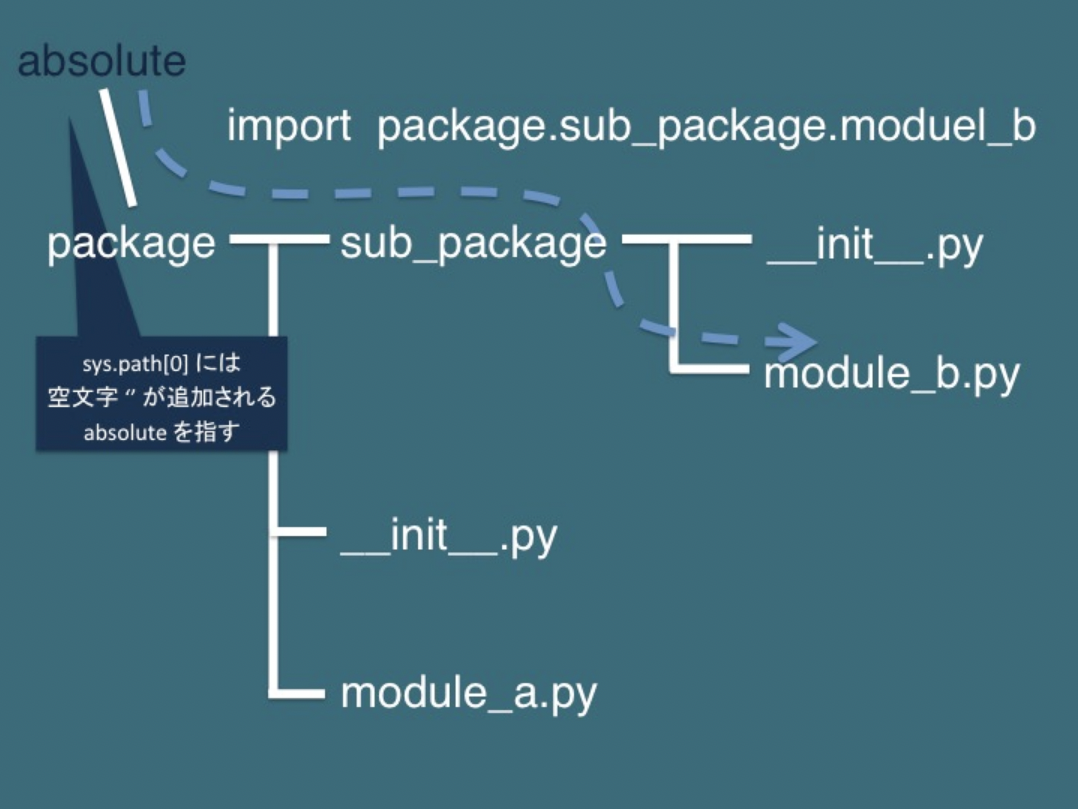

scriptとしてディレクトリを実行した場合：起動したスクリプトがあるディレクトリ
```
# ~/import/absolute/package/__main__.py
# sys.path[0]（=script)からmodule_bのパス
import sub_package.module_b
```

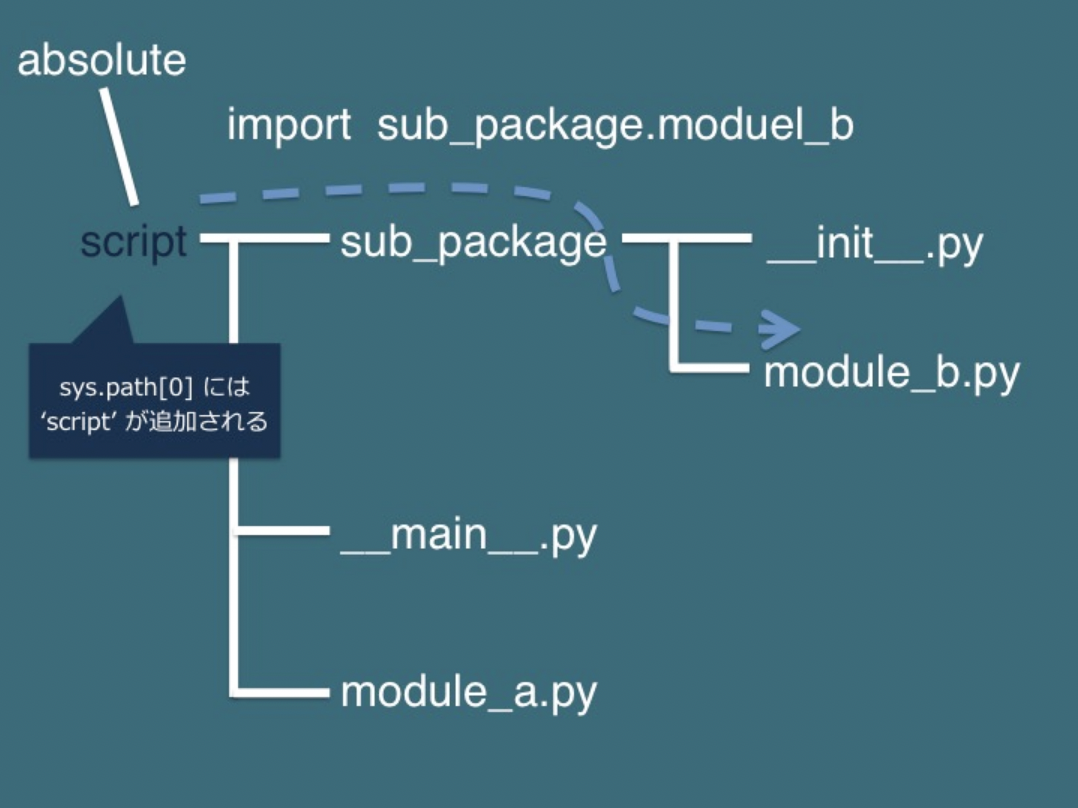

そのため、実行時のパスが異なるためimportする時の指定の仕方が異なる。（=Pythonがモジュールの探索を開始する場所が変化する）
- スクリプトで実行：Pythonインタプリタを起動したスクリプトのあるディレクトリ
- 対話モードや標準入力から読み込んだ場合：カレントディレクトリ

特殊変数
- \_\_file\_\_：現在実行しているスクリプトファイルの絶対パス（ver.3.9以降）
- \_\_package\_\_：